## OMIS 3000 Final Project
 
### Title : Applications of Machine Learning:  Predicting Loan Status and Future Housing Prices

Table of Contents

1. Introduction
2. Business Problem 
3. Objective and Scope
4. Data Pre-propcessing
5. Data Exploration
6. Classification: Predicting Loan Status (Risk)
7. Prediction: Predicting Future Housing Prices
8. Conclusion

## 1. Introduction
As of the fourth quarter of 2022, the residential morgage debt totaled approximately $11.92 trillion in the U.S. The increasing cost of owning real estate, the rise of short term rentals and slow growth in job openings and salary raises is leaving many Americans with a bleak outlook on their ability to one day purchase a home. It is common for new homeowners to purchase a home with a down payment and take out a mortgage or other loan to finance their residence. Various Financial Insititutions provide such loans, but in this project we will utilize data from [LendingClub Financial Services](https://www.lendingclub.com/personal-loan/loan-types) and from open source kaggle datasets on salaries in the U.S. and california real estate prices. 

We will tackle a real business problem in helping clients understand factors that determine whether they get accepted for specific loan amounts. This can enable them to adjust their short term and long term financial goals. The problem is solved using Exploratory Data Analysis (EDA) to understand patterns of the data and Machince Learning for Classification and Regression/Prediction. This project also allows to understand risk analysis in financial services and how institutions utilize data to chose appropriate clients and minimize losses.

## 2. Objective and Scope

The analysis is performed using a variety of datasets and is divided into three parts:
* Exploratory Data Analysis
* Classification Machine Learning: Fully Paid/or Charged Off on Loan
* Prediction Machnine Learning on a Time Series: Future housing prices in California

The analysis, training and testing will be performed on subsets of data from the California housing market. This is to provide a targeted customer segment details about patterns within the state and it will provide reduced running times compared to training on datasets that cover the entire nation. Additionally, the models built can be applied to other datasets by adjusting hyperparameters.


## 3. Data Description

The LendingClub Dataset was collected from the [LendingClub API](https://www.kaggle.com/datasets/wordsforthewise/lending-club)  via kaggle. In Financial Analytics, the company aims to identify 'risky' applicants by understanding driving factors that could lead to a loan defaulting. Understanding the types of variables and their significances is essential to develop an effective machine model to classify new applicants.

**The LendingClub dataset contains the following columns:** 

(Dated 1/1/2020)

|Column Label|Description|
|:------------|:--------|
|loan_amnt	|The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
|term	|The number of payments on the loan. Values are in months and can be either 36 or 60.|
|int_rate|Interest Rate on the loan|
|installment|The monthly payment owed by the borrower if the loan originates.|
|grade|LC assigned loan grade|
|sub_grade|LC assigned loan subgrade|
|emp_title|The job title supplied by the Borrower when applying for the loan.|
|emp_length|Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.|
|home_ownership|The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER|
|annual_inc|The self-reported annual income provided by the borrower during registration.|
|verification_status|Indicates if income was verified by LC, not verified, or if the income source was verified|
|issue_d|The month which the loan was funded|
|loan_status|Current status of the loan|
|purpose|A category provided by the borrower for the loan request.|
|title|The loan title provided by the borrower|
|zip_code|The first 3 numbers of the zip code provided by the borrower in the loan application.|
|addr_state|The state provided by the borrower in the loan application|
|dti|A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
|earliest_cr_line|The month the borrower's earliest reported credit line was opened|
|open_acc|The number of open credit lines in the borrower's credit file.|
|pub_rec|Number of derogatory public records|
revol_bal|Total credit revolving balance|
|revol_util|Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.|
|total_acc|The total number of credit lines currently in the borrower's credit file|
|initial_list_status|The initial listing status of the loan. Possible values are – W(whole loan), F(Fractional loan)|
|application_type|Indicates whether the loan is an individual application or a joint application with two co-borrowers|
|mort_acc|Number of mortgage accounts.|
|pub_rec_bankruptcies|Number of public record bankruptcies|
|address| Mailing adress of borrower|




The [California Housing Dataset](https://www.kaggle.com/datasets/dhirajnirne/california-housing-data/data) was retreived from the kaggle site contains data profiles for homes around california. This set can provide information to predict a home median price depending on the number of rooms, location and household median income.

**The California Housing Dataset contains the following columns:**
(Dated 5/13/2022)

|Column Label| Description|
|:-----------|:-----------|
|longitude |A measure of how far west a house is; a higher value is farther west|
|latitude|A measure of how far north a house is; a higher value is farther north|
|housing_median_age |Median age of a house within a block; a lower number is a newer building|
|total_rooms|Total number of rooms within a block|
|total_bedrooms|Total number of bedrooms within a block|
|population|Total number of people residing within a block|
|households|Total number of households, a group of people residing within a home unit, for a block|
|median_income|Median income for households within a block of houses (measured in tens of thousands of US Dollars)|
|median_house_value|Median house value for households within a block (measured in US Dollars)|
|ocean_proximity|The house has a Ocean view or not.|

To predict future home prices, we will be using the historical home listing and sale prices accross the U.S. from the [Zillow platform](https://www.zillow.com/research/data/). The dataset contains information for homes with 1, 2, 3, 4 and 5 bedrooms.

**The Zillow Datasets contain the following columns**
|Column Label| Description|
|:-----------|:-----------|
|RegionName| Name of city|
|StateName| Name of state|
|Metro| Name of metro area closest to city|
|CountyName|Name of city's County|
|*Columns from 01/01/2000 to 09/30/2023*|*Dates*|

* Note that this dataset would need to transformed into a Time Series by turning dates into the index for rows. Additionally, latitude and longitude data for each region will be added to be consistent with the California Housing Dataset and identify the cities.


## 4. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lending_club = pd.read_csv('lending_club_loan_two.csv')

In [2]:
lending_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [3]:
lending_club.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [4]:
lending_club['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [5]:
lending_club.iloc[:,:10].head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0


In [6]:
lending_club.iloc[:,10:18].head()

,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc
0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0
1,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0
2,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0
3,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0
4,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0


In [7]:
lending_club.iloc[:,18:27].head()

,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


### Data Cleaning

**LendingClub Dataset Cleaning**

In [8]:
lending_club['verification_status']= lending_club['verification_status'].str.replace('Source',"").str.strip()
lending_club['verification_status'].value_counts()

verification_status
Verified        270948
Not Verified    125082
Name: count, dtype: int64

In [9]:
#check datatypes and column names
lending_club.rename({'term':'term_months'}, axis = 1, inplace = True)

#drop irrelevant columns - 'address'
lending_club_clean = lending_club.drop(columns = ['address', 'purpose', 'emp_title'])
#only keep data with verified income
lending_club_clean = lending_club_clean[lending_club_clean['verification_status'] == 'Verified']


In [10]:
lending_club_clean['emp_length_copy'] = lending_club_clean['emp_length'].str.replace("years","").str.replace("year","").str.replace("<","").str.replace("+","").str.strip()

lending_club_clean['emp_length_copy'] 

emp_len_mean = lending_club_clean['emp_length_copy'][lending_club_clean['emp_length_copy'].notnull()].astype(int).mean()


In [11]:
lending_club_clean['term_months'] = lending_club_clean['term_months'].str.replace('months',"").str.strip().astype(int)

In [12]:
#replace emp_length with mean
lending_club_clean['emp_length_copy'].fillna(emp_len_mean, inplace = True)
lending_club_clean['emp_length_copy'] = lending_club_clean['emp_length_copy'].astype(int)

In [13]:

lending_club_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270948 entries, 2 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             270948 non-null  float64
 1   term_months           270948 non-null  int32  
 2   int_rate              270948 non-null  float64
 3   installment           270948 non-null  float64
 4   grade                 270948 non-null  object 
 5   sub_grade             270948 non-null  object 
 6   emp_length            254409 non-null  object 
 7   home_ownership        270948 non-null  object 
 8   annual_inc            270948 non-null  float64
 9   verification_status   270948 non-null  object 
 10  issue_d               270948 non-null  object 
 11  loan_status           270948 non-null  object 
 12  title                 269632 non-null  object 
 13  dti                   270948 non-null  float64
 14  earliest_cr_line      270948 non-null  object 
 15  open_

In [14]:
# calculate length of credit /history
lending_club_clean['earliest_cr_line'] =  pd.to_datetime(lending_club_clean['earliest_cr_line'])

lending_club_clean['earliest_cr_line'] 

C:\Users\laris\AppData\Local\Temp\ipykernel_18304\2147690484.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lending_club_clean['earliest_cr_line'] =  pd.to_datetime(lending_club_clean['earliest_cr_line'])


2        2007-08-01
4        1999-03-01
5        2005-01-01
6        2005-08-01
8        1994-06-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 270948, dtype: datetime64[ns]

In [15]:
lending_club_clean['issue_d'] = pd.to_datetime(lending_club_clean['issue_d'])
lending_club_clean['issue_d']

C:\Users\laris\AppData\Local\Temp\ipykernel_18304\561589059.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lending_club_clean['issue_d'] = pd.to_datetime(lending_club_clean['issue_d'])


2        2015-01-01
4        2013-04-01
5        2015-09-01
6        2015-09-01
8        2014-10-01
            ...    
396025   2015-10-01
396026   2015-02-01
396027   2013-10-01
396028   2012-08-01
396029   2010-06-01
Name: issue_d, Length: 270948, dtype: datetime64[ns]

In [16]:
from dateutil.relativedelta import relativedelta

lending_club_clean['credit_hist_len_years'] = lending_club_clean.apply(lambda x: relativedelta(x['issue_d'], x['earliest_cr_line']).years, axis=1)

lending_club_clean['credit_hist_len_years']


2          7
4         14
5         10
6         10
8         20
          ..
396025    10
396026     9
396027    16
396028    21
396029    11
Name: credit_hist_len_years, Length: 270948, dtype: int64

In [17]:
## seperate data with and without mort_acc data
lending_club_clean_no_mortd = lending_club_clean[lending_club_clean['mort_acc'].isnull()]
lending_club_clean_mortd = lending_club_clean[lending_club_clean['mort_acc'].notnull()]

**California Housing Dataset Cleaning**

In [18]:
cali_housing = pd.read_csv('Calhousing.csv')
cali_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
cali_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
#check null values
cali_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [21]:
#add average number of bedrooms and total rooms per household 
cali_housing['avg_bedrooms_per_household'] = round(cali_housing['total_bedrooms']/cali_housing['households'])
cali_housing['avg_rooms_per_household'] = round(cali_housing['total_rooms']/cali_housing['households'])

cali_housing[cali_housing['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_bedrooms_per_household,avg_rooms_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,NaN,6.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,NaN,4.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,NaN,4.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,NaN,6.0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,NaN,5.0
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,NaN,3.0
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,NaN,6.0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,NaN,7.0


In [22]:
#seperate data
#without null values (total bedrooms and corresponding rows)
cali_housing_clean = cali_housing.dropna(axis = 0)

#subset of data, long, lat, median_age, median_income, median_house_value

cali_housing_sub = cali_housing_clean.drop(columns =['total_rooms', 'total_bedrooms', 'households', 'avg_bedrooms_per_household', 'avg_rooms_per_household'])

In [23]:
cali_housing_sub.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
population            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**Zillow Time Series Dataset**

In [24]:
zillow_data_1b = pd.read_csv('MedianHousePrice_Zillow/1_bedroom_MedianHousePrice_Zillow.csv')
zillow_data_2b = pd.read_csv('MedianHousePrice_Zillow/2_bedroom_MedianHousePrice_Zillow.csv')
zillow_data_3b = pd.read_csv('MedianHousePrice_Zillow/3_bedroom_MedianHousePrice_Zillow.csv')
zillow_data_4b = pd.read_csv('MedianHousePrice_Zillow/4_bedrooms_MedianHousePrice_Zillow.csv')
zillow_data_5pb = pd.read_csv('MedianHousePrice_Zillow/5plus_bedroom_MedianHousePrice_Zillow.csv')

list_zillow = [zillow_data_1b, zillow_data_2b, zillow_data_3b,zillow_data_4b,zillow_data_5pb]



## 5. Data Exploration

**LendingClub Dataset**

In [25]:
%matplotlib inline 
#Descriptive Stats
lending_club_clean_no_mortd.describe()

,loan_amnt,term_months,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,emp_length_copy,credit_hist_len_years
count,22401.000000,22401.000000,22401.000000,22401.000000,2.240100e+04,22401,22401.000000,22401,22401.000000,22401.000000,22401.000000,22379.000000,22401.000000,0.0,22400.000000,22401.000000,22401.000000
mean,13657.408151,44.115709,12.690093,390.092232,7.458788e+04,2011-04-04 04:36:21.116914432,13.707642,1997-02-12 09:34:29.746886272,9.544261,0.048569,14878.138163,51.488665,22.714745,NaN,0.038616,5.340253,13.684032
min,1000.000000,36.000000,5.420000,20.220000,4.800000e+03,2008-03-01 00:00:00,0.000000,1950-12-01 00:00:00,2.000000,0.000000,0.000000,0.000000,3.000000,NaN,0.000000,1.000000,3.000000
25%,7000.000000,36.000000,9.910000,207.600000,4.500000e+04,2010-11-01 00:00:00,8.600000,1993-12-01 00:00:00,6.000000,0.000000,4490.000000,29.100000,14.000000,NaN,0.000000,2.000000,9.000000
50%,12000.000000,36.000000,12.610000,343.830000,6.250000e+04,2011-06-01 00:00:00,13.810000,1998-06-01 00:00:00,9.000000,0.000000,10319.000000,53.200000,21.000000,NaN,0.000000,5.000000,12.000000
75%,20000.000000,60.000000,15.580000,518.660000,9.000000e+04,2011-11-01 00:00:00,18.970000,2001-09-01 00:00:00,12.000000,0.000000,19280.000000,74.900000,30.000000,NaN,0.000000,9.000000,17.000000
max,35000.000000,60.000000,24.890000,1337.760000,6.000000e+06,2012-04-01 00:00:00,29.990000,2009-01-01 00:00:00,35.000000,3.000000,149588.000000,99.900000,87.000000,NaN,2.000000,10.000000,60.000000
std,8338.380273,11.354208,4.015195,235.487365,6.678134e+04,NaN,6.680012,NaN,4.366954,0.222522,16772.059765,27.959731,11.305374,NaN,0.193837,3.394406,6.883442


In [26]:
lending_club_clean_mortd.describe()

,loan_amnt,term_months,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,emp_length_copy,credit_hist_len_years
count,248547.000000,248547.000000,248547.000000,248547.000000,2.485470e+05,248547,248547.000000,248547,248547.000000,248547.000000,2.485470e+05,248374.000000,248547.000000,248547.000000,248547.000000,248547.000000,248547.000000
mean,16016.346808,43.123900,14.435108,487.386054,7.864743e+04,2014-06-18 20:00:39.107291392,18.241324,1998-02-20 17:57:39.126845312,11.691012,0.214116,1.743802e+04,55.168655,26.347693,1.917746,0.140195,6.203535,15.864500
min,1000.000000,36.000000,5.320000,23.610000,6.000000e+02,2012-03-01 00:00:00,0.000000,1944-01-01 00:00:00,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,1.000000,3.000000
25%,9000.000000,36.000000,11.140000,285.190000,4.800000e+04,2013-09-01 00:00:00,11.960000,1994-07-01 00:00:00,8.000000,0.000000,6.534000e+03,37.600000,18.000000,0.000000,0.000000,3.000000,11.000000
50%,15000.000000,36.000000,14.090000,434.840000,6.600000e+04,2014-07-01 00:00:00,17.800000,1999-08-01 00:00:00,11.000000,0.000000,1.226800e+04,56.300000,25.000000,1.000000,0.000000,6.000000,14.000000
75%,21550.000000,60.000000,17.570000,654.680000,9.500000e+04,2015-05-01 00:00:00,24.190000,2003-03-01 00:00:00,14.000000,0.000000,2.170200e+04,73.900000,33.000000,3.000000,0.000000,10.000000,19.000000
max,40000.000000,60.000000,30.990000,1533.810000,8.706582e+06,2016-12-01 00:00:00,1622.000000,2013-10-01 00:00:00,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000,10.000000,70.000000
std,8839.471254,10.964677,4.578533,267.481017,6.900660e+04,NaN,8.989864,NaN,5.233828,0.598243,2.314286e+04,24.131831,12.028762,2.202623,0.384703,3.405869,7.291299


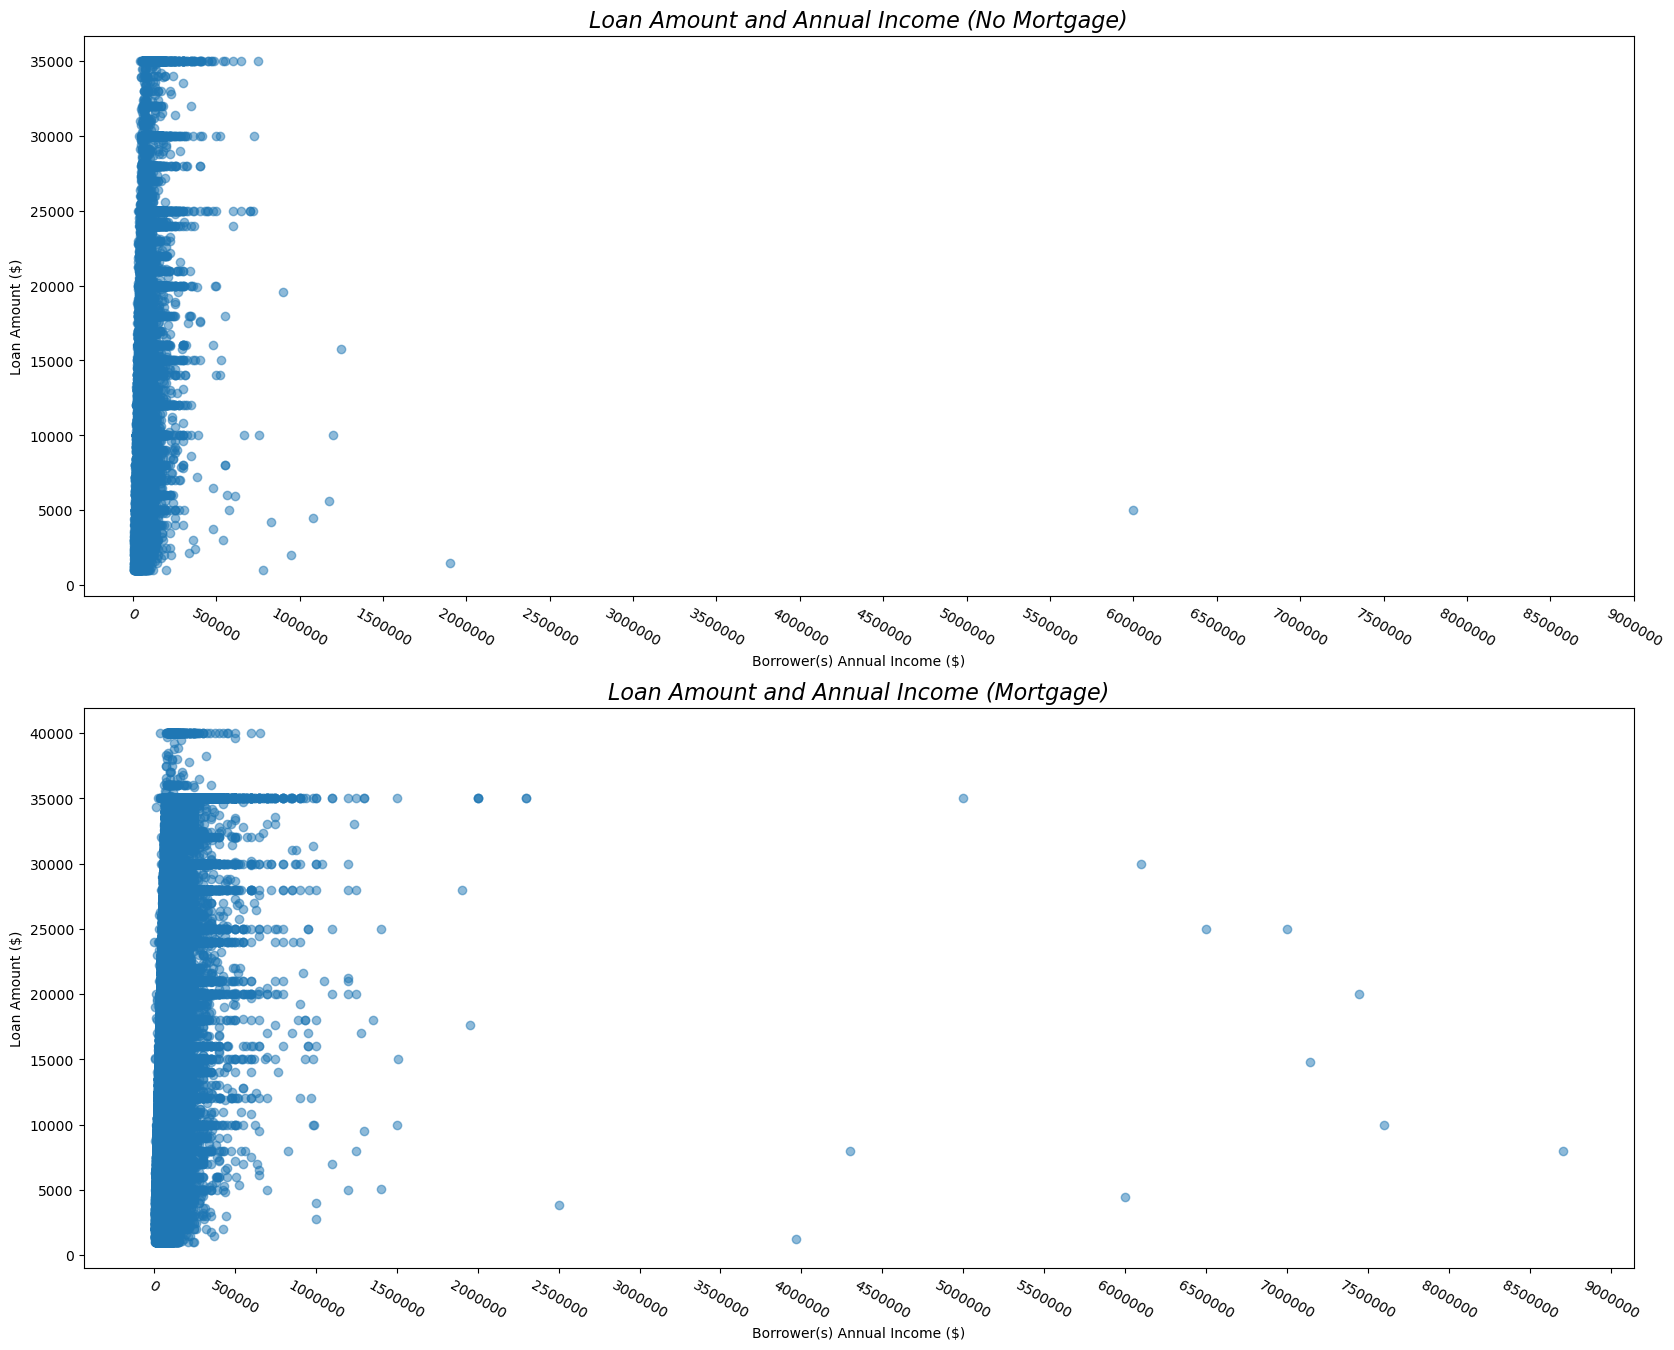

In [27]:
#Plot loan amount vs income

fig, ax = plt.subplots(2,1, figsize=(20,16))
mort_nomort = [lending_club_clean_no_mortd, lending_club_clean_mortd ]
income_labels = [0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000,5500000,6000000, 6500000, 7000000,7500000,8000000,8500000,9000000]
titles = ['Have a Mortgage', 'Do Not Have Mortgage']

for i,m,n in zip([0,1], mort_nomort, ['No Mortgage', 'Mortgage']):
    ax[i].scatter(data = m, x='annual_inc', y= 'loan_amnt', alpha = 0.5) 
    ax[i].set_xticks([0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000,5500000,6000000,6500000, 7000000,7500000,8000000,8500000,9000000], income_labels, rotation = -30)
    ax[i].set_title(f'Loan Amount and Annual Income ({n})', weight= 300, fontstyle = 'oblique', fontsize = 16)
    ax[i].set_xlabel('Borrower(s) Annual Income ($)')
    ax[i].set_ylabel('Loan Amount ($)')
plt.show()


* The plot of annual income vs loan ammount shows that there are outliers, which may skew the data during the analysis portion. The maximum income for borrowers with Mortgages is higher than those without mortgages. Those with Mortgages also have higher mean and median income, but also loan amount.

C:\Users\laris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Loan Grade Distribution per Annual Income (No Mortgage)')

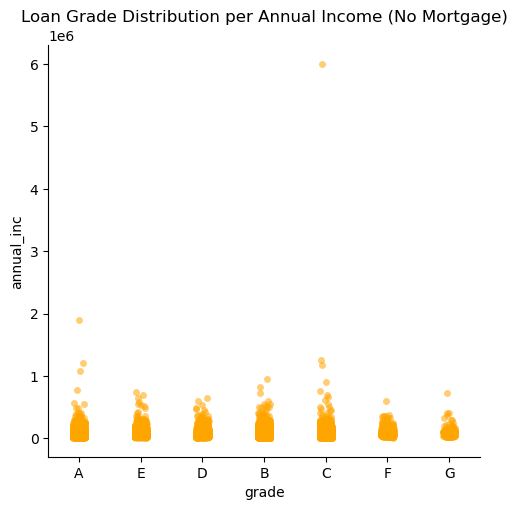

In [28]:
#distribution of income per grade/subgrade

sns.catplot(data = mort_nomort [0], x = 'grade', y ='annual_inc', color = 'orange', alpha = 0.55)
plt.title('Loan Grade Distribution per Annual Income (No Mortgage)')


C:\Users\laris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Loan Grade Distribution per Annual Income (Mortgage)')

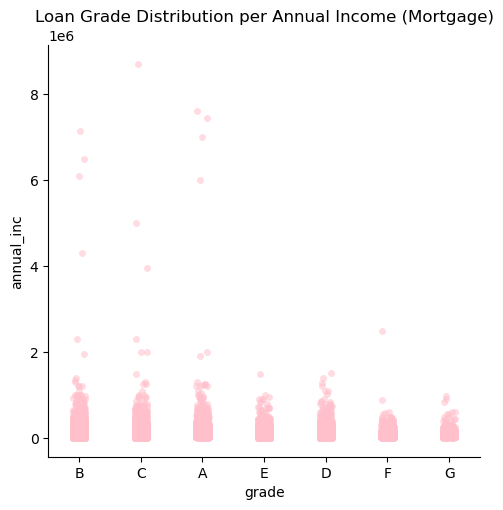

In [29]:
sns.catplot(data = mort_nomort [1], x = 'grade', y ='annual_inc', color = 'pink', alpha = 0.55)
plt.title('Loan Grade Distribution per Annual Income (Mortgage)')


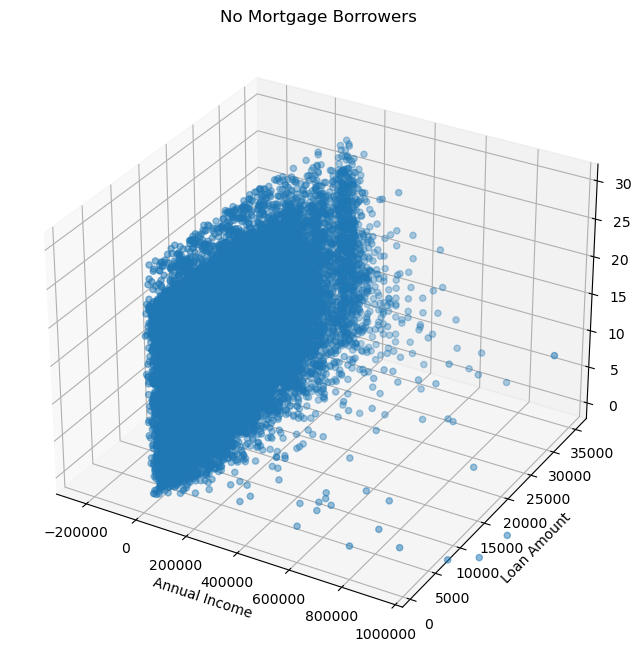

In [30]:
#print loan amount vs income vs dti, hue rent/own

plt.figure(figsize=(10,8))
axes = plt.axes(projection="3d")

xyz =mort_nomort[0] 
axes.scatter3D(xyz['annual_inc'], xyz['loan_amnt'], xyz['dti'])

axes.set_xlim(right = 1000000)
axes.set_xlabel("Annual Income")
axes.set_ylabel("Loan Amount")
axes.set_zlabel("DTI", rotation =90)

axes.set_title('No Mortgage Borrowers')
axes.ticklabel_format(axis = 'x', style = 'plain')


plt.show()

* Note 'dti' has an outlier which skews the data, for the sake of visualization we will not include that point in the limit of our plot

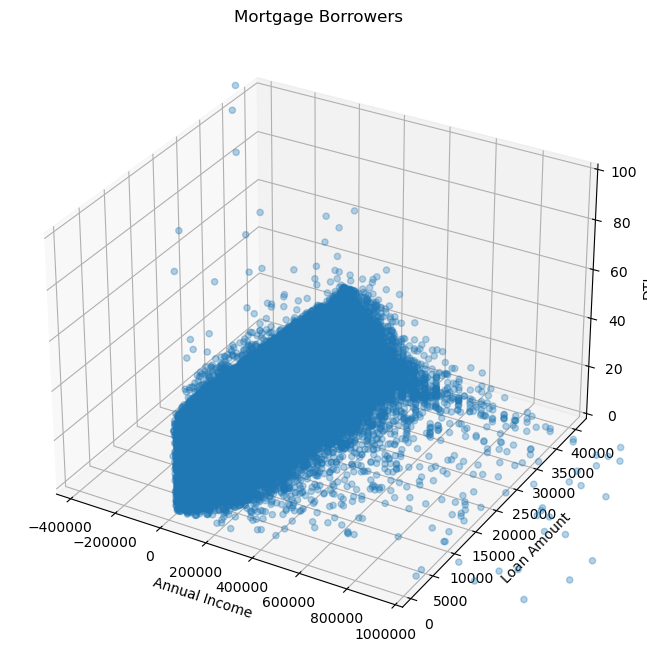

In [31]:
#print loan amount vs income vs dti, hue rent/own

plt.figure(figsize=(10, 8))
axes = plt.axes(projection="3d")

xyz =mort_nomort[1] 
axes.scatter3D(xyz['annual_inc'], xyz['loan_amnt'], xyz['dti'])

axes.set_xlim(right = 1000000)
axes.set_zlim(0,100)
axes.set_xlabel("Annual Income")
axes.set_ylabel("Loan Amount")
axes.set_zlabel("DTI", rotation =90)
axes.ticklabel_format(axis = 'x', style = 'plain')

axes.set_title('Mortgage Borrowers')

plt.show()

In [32]:
def mort(data):
    if np.isnan(data):
        return 'No Mortgage'
    else:
        return 'Mortgage'

lending_club_clean['mortgage'] = lending_club_clean['mort_acc'].apply(mort)    

C:\Users\laris\AppData\Local\Temp\ipykernel_18304\3574833188.py:1: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.relplot(data= lending_club_clean, x= 'annual_inc', y = 'loan_amnt', row = 'mortgage', col='loan_status', hue = 'grade', size = 'dti', palette = sns.color_palette("flare"))
C:\Users\laris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(-434699.10000000003, 1000000.0)

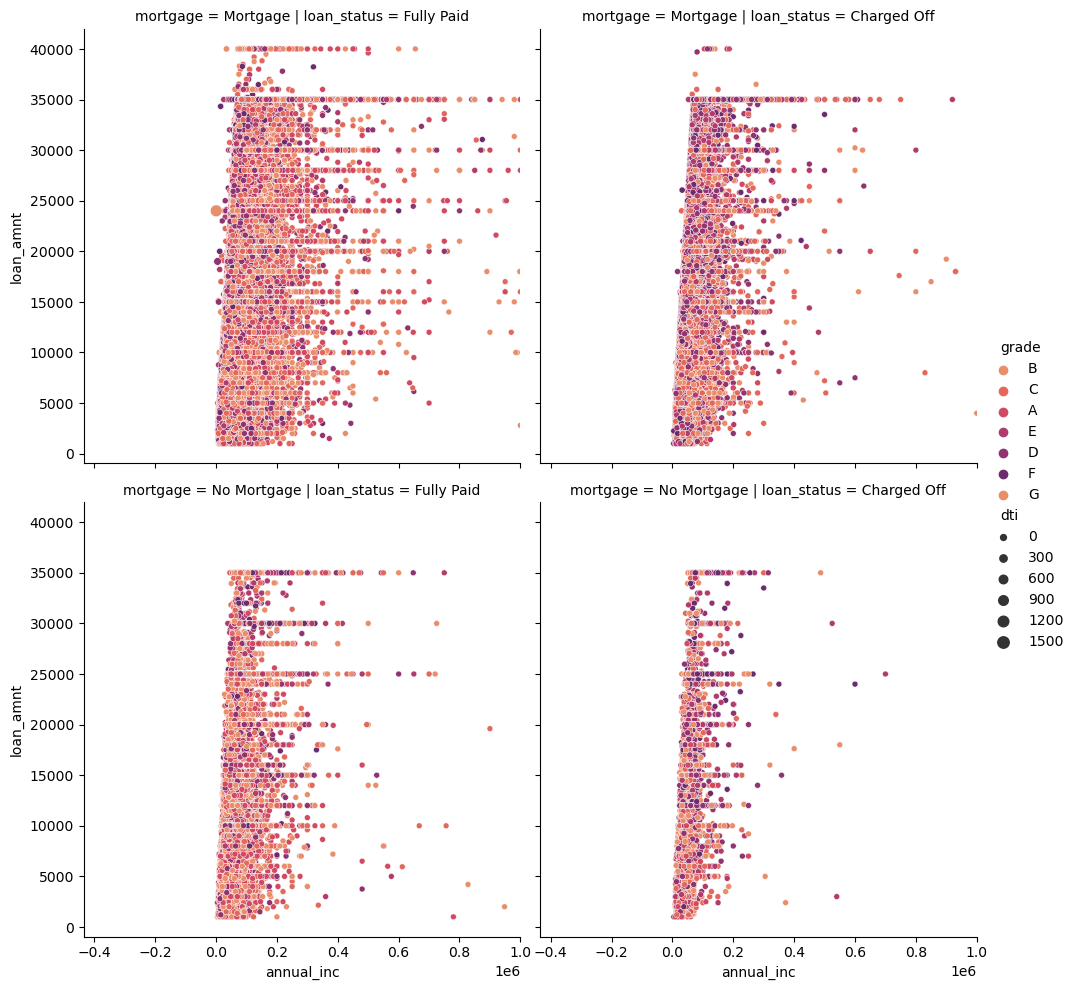

In [33]:

sns.relplot(data= lending_club_clean, x= 'annual_inc', y = 'loan_amnt', row = 'mortgage', col='loan_status', hue = 'grade', size = 'dti', palette = sns.color_palette("flare"))

plt.xlim(right = 1000000)

Text(0, 0.5, 'Number of Loans')

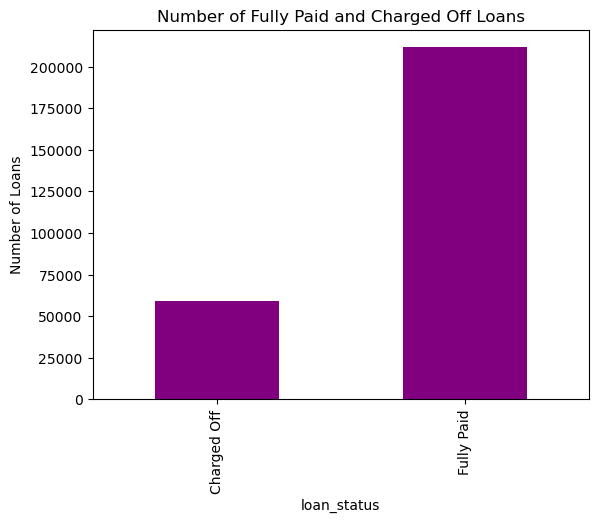

In [34]:
#loan status bar chart (group by loan status)

lending_club_loan_status = lending_club_clean.groupby('loan_status')['loan_amnt'].count()

lending_club_loan_status.plot.bar( color = 'purple')
plt.title('Number of Fully Paid and Charged Off Loans')
plt.ylabel('Number of Loans')

In [35]:
#correlations between nnumeric variables


lending_club_clean_numeric = lending_club_clean[['loan_amnt', 'term_months', 'int_rate', 'installment', 'annual_inc', 'emp_length_copy','dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc','mort_acc', 'pub_rec_bankruptcies']]

lending_club_clean_numeric.corr()

,loan_amnt,term_months,int_rate,installment,annual_inc,emp_length_copy,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.355542,0.148032,0.948216,0.326643,0.090304,0.000531,0.193301,-0.114404,0.319235,0.098570,0.217794,0.222649,-0.143424
term_months,0.355542,1.000000,0.460560,0.097442,0.033982,0.050816,0.051990,0.062054,-0.044916,0.058215,0.056765,0.076146,0.067776,-0.039621
int_rate,0.148032,0.460560,1.000000,0.133406,-0.065887,0.011591,0.152158,0.016800,0.043822,-0.031420,0.256389,-0.031350,-0.086802,0.044581
installment,0.948216,0.097442,0.133406,1.000000,0.322607,0.078579,0.002255,0.185630,-0.099348,0.308193,0.120066,0.198677,0.196178,-0.131474
annual_inc,0.326643,0.033982,-0.065887,0.322607,1.000000,0.053945,-0.185077,0.127107,-0.023859,0.295062,0.026122,0.177400,0.220846,-0.061348
emp_length_copy,0.090304,0.050816,0.011591,0.078579,0.053945,1.000000,0.034606,0.041875,0.024859,0.079382,0.041466,0.108367,0.180640,0.026294
dti,0.000531,0.051990,0.152158,0.002255,-0.185077,0.034606,1.000000,0.273600,-0.049906,0.113756,0.183798,0.196352,-0.069738,-0.037476
open_acc,0.193301,0.062054,0.016800,0.185630,0.127107,0.041875,0.273600,1.000000,-0.024869,0.216392,-0.130685,0.677932,0.108923,-0.031459
pub_rec,-0.114404,-0.044916,0.043822,-0.099348,-0.023859,0.024859,-0.049906,-0.024869,1.000000,-0.111982,-0.093985,0.011726,-0.003767,0.676502
revol_bal,0.319235,0.058215,-0.031420,0.308193,0.295062,0.079382,0.113756,0.216392,-0.111982,1.000000,0.223790,0.181572,0.191642,-0.136494


Text(0.5, 1.0, 'LendingClub Dataset - Correlations Between Numeric Variables')

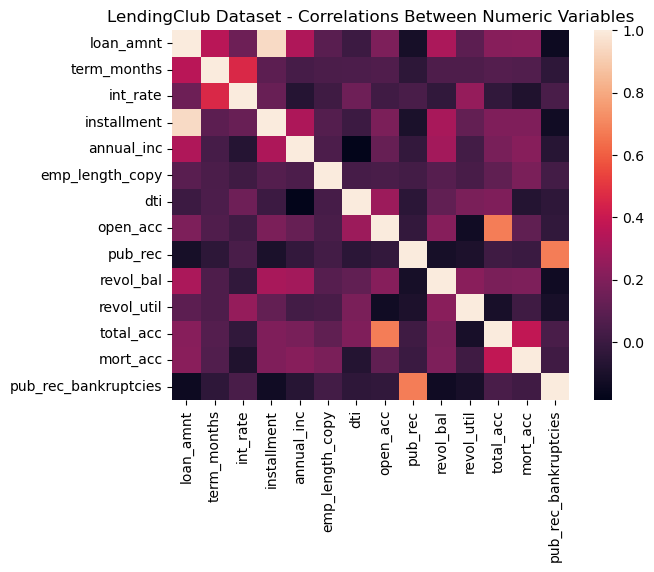

In [36]:
sns.heatmap(data = lending_club_clean_numeric.corr())

plt.title('LendingClub Dataset - Correlations Between Numeric Variables')

**California Housing Dataset**

In [37]:
cali_housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_bedrooms_per_household,avg_rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.0,7.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1.0,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.0,8.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.0,6.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.0,6.0


In [38]:
cali_housing_sub['median_house_value'].value_counts()

median_house_value
500001.0    958
137500.0    119
162500.0    116
112500.0    103
187500.0     92
           ... 
359200.0      1
51200.0       1
39800.0       1
377600.0      1
47000.0       1
Name: count, Length: 3833, dtype: int64

C:\Users\laris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Population Distribution Across California (2022)')

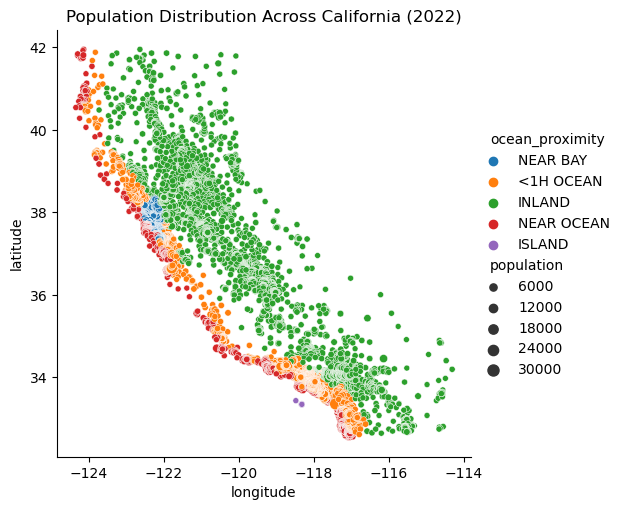

In [39]:
#plot latidude/longitude scatter, hue and color bar 

sns.relplot(data = cali_housing_clean, x = 'longitude', y= 'latitude', hue = 'ocean_proximity', size = 'population', marker = 'o', s = 20)

plt.title('Population Distribution Across California (2022)')

C:\Users\laris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\laris\AppData\Local\Temp\ipykernel_18304\3003837901.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


Text(0.5, 1.0, 'Median House Value Accross California (2022)')

<Figure size 640x480 with 0 Axes>

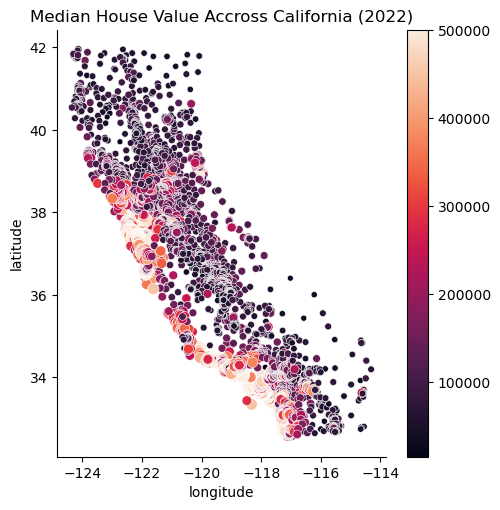

In [40]:
plt.figure()
ax = sns.relplot(data = cali_housing_clean, x = 'longitude', y= 'latitude', hue = 'median_house_value', size = 'median_house_value', palette = 'rocket', legend = False)

norm = plt.Normalize(cali_housing_clean['median_house_value'].min(), cali_housing_clean['median_house_value'].max())

sm = plt.cm.ScalarMappable(cmap="rocket", norm=norm)
sm.set_array([])

ax.figure.colorbar(sm)
plt.title('Median House Value Accross California (2022)')


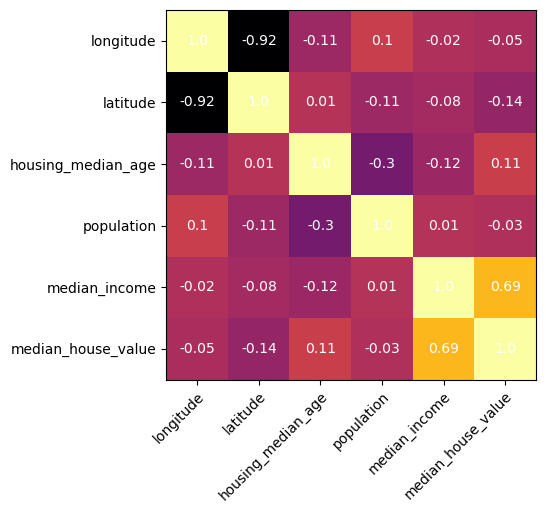

In [41]:
#plot correlation between numerical features
fig, ax  = plt.subplots()
cali_housing_num_corr = cali_housing_sub.drop(columns= 'ocean_proximity').corr()

img = ax.imshow(cali_housing_num_corr, cmap = 'inferno')

ax.set_xticks(np.arange(cali_housing_num_corr['longitude'].size), labels = cali_housing_num_corr.columns)
ax.set_yticks(np.arange(cali_housing_num_corr['longitude'].size), labels = cali_housing_num_corr.columns)

#show corr text on heatmap
for i in np.arange(cali_housing_num_corr['longitude'].size):
                for j in np.arange(cali_housing_num_corr['longitude'].size):
                    text = ax.text(i, j , round(cali_housing_num_corr.iloc[j,i],2) , color = 'w', ha = 'center', va = 'center')
        
                #change middle text color to black:  
                #textc = ax.text(i, k, round(cali_housing_num_corr.iloc[j,i],2) , color = 'b', ha = 'center', va = 'center')

plt.setp(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.show()


In [42]:
cali_housing_loc = cali_housing_clean.groupby('ocean_proximity').mean()
cali_housing_loc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bedrooms_per_household,avg_rooms_per_household
ocean_proximity,,,,,,,,,,,
<1H OCEAN,-118.848642,34.560734,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812,1.004096,5.148107
INLAND,-119.733085,36.731806,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147,1.127463,5.976909
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000,1.600000,5.400000
NEAR BAY,-122.261035,37.801304,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070,1.005286,5.217621
NEAR OCEAN,-119.329836,34.736065,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023,1.018645,5.205860


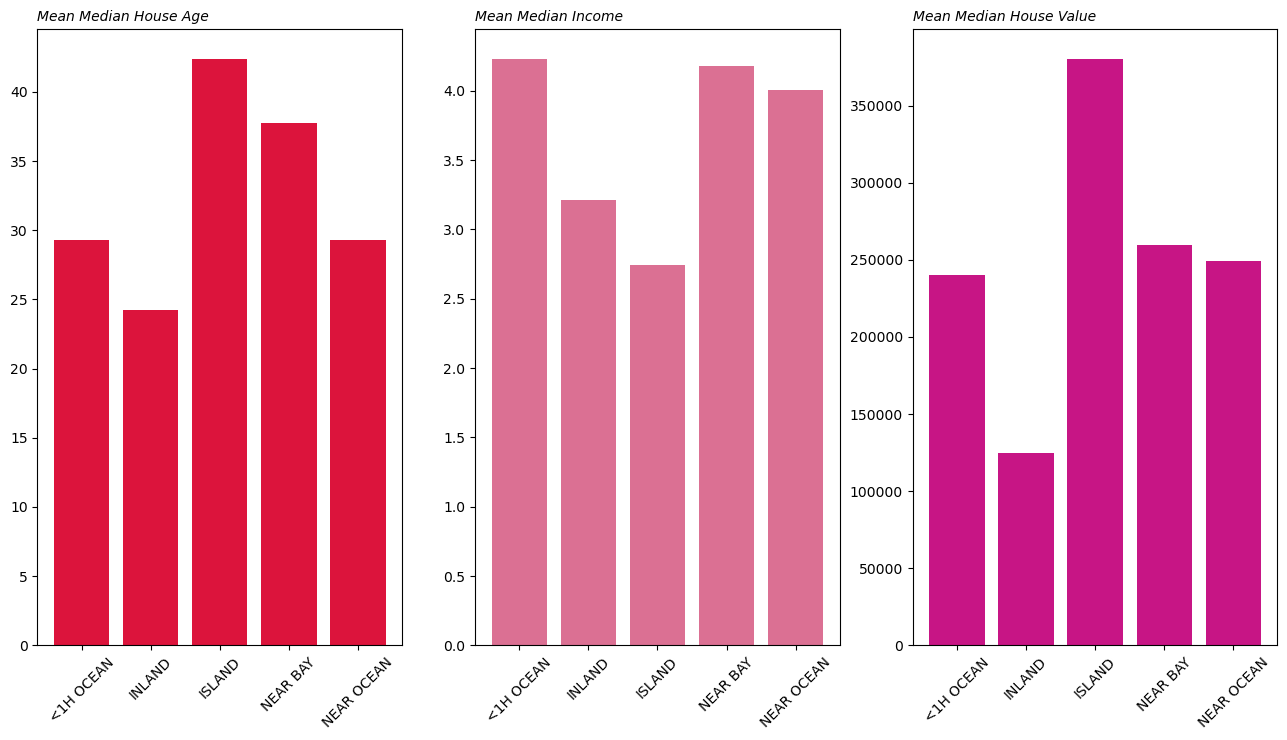

In [43]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize= (16,8))

ax[0].bar(x=cali_housing_loc.index, height= 'housing_median_age', data = cali_housing_loc, color = 'crimson')
ax[1].bar(x=cali_housing_loc.index, height= 'median_income', data = cali_housing_loc, color = 'palevioletred' )
ax[2].bar(x=cali_housing_loc.index, height= 'median_house_value', data = cali_housing_loc, color = 'mediumvioletred')

ax[0].set_title('Mean Median House Age', loc='left', fontstyle='oblique', fontsize='medium')    
ax[1].set_title('Mean Median Income', loc='left', fontstyle='oblique', fontsize='medium')
ax[2].set_title('Mean Median House Value', loc='left', fontstyle='oblique', fontsize='medium')

for a in ax:
    for tick in a.get_xticklabels():
        tick.set_rotation(45)


**Zillow Time Series Dataset**

In [44]:
##add to cleaning
#combine all dataframes(all bedrooms)
zillow_all = pd.DataFrame()
for i in range(len(list_zillow)):
    zillow_all = pd.concat([zillow_all, list_zillow[i]], ignore_index = True)


In [45]:
zillow_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3190 entries, 0 to 3189
Columns: 292 entries, RegionName to 9/30/2023
dtypes: float64(288), object(4)
memory usage: 7.1+ MB


In [46]:
zillow_all.drop(columns=['Longitude', 'Latitude', 'StateName','Metro', 'CountyName'], inplace = True)

In [47]:
zillow_all.head()

,RegionName,NumBedrooms,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,...,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023
0,Los Angeles,1.0,126834.9297,127079.68610,127743.64430,129097.48450,130776.31560,132453.70650,134155.85870,135796.08650,...,596377.7972,593991.2697,588096.4533,580708.0832,575759.9049,573432.9360,573523.9637,576263.0953,581282.7514,587382.1462
1,San Diego,1.0,111562.1643,112079.81270,112698.58660,114099.43750,115667.55330,117730.12590,120057.60230,122564.83850,...,494877.3308,493032.1626,491144.8250,489946.0696,490099.7482,492150.2729,496460.5051,501434.8085,506855.6321,512022.2783
2,San Jose,1.0,174780.1940,175396.88660,176508.56580,179909.23330,183840.45490,188360.22930,192176.29390,196688.98230,...,592008.1673,590598.1871,587978.2926,585515.4274,583000.3950,582171.0924,583051.0295,585819.8277,589759.9074,594793.1200
3,San Francisco,1.0,327463.2486,329665.19640,332304.90040,337765.54820,344048.02700,351132.51080,359489.06110,368336.56470,...,792302.7864,782215.6748,773160.1372,766964.5564,763411.1299,761205.6354,760347.7221,760576.6128,761268.2804,761053.9548
4,Sacramento,1.0,90556.6894,90770.99626,91060.97604,91688.48027,92383.27716,92848.86622,93742.34799,95170.13177,...,363541.0043,359597.7114,356000.2032,353014.4493,351874.3609,350949.2466,351164.2462,351308.9795,352053.5938,352850.8200


In [48]:
zillow_1b = zillow_all[zillow_all['NumBedrooms'] == 1.0]
zillow_2b = zillow_all[zillow_all['NumBedrooms'] == 2.0]
zillow_3b = zillow_all[zillow_all['NumBedrooms'] == 3.0]
zillow_4b = zillow_all[zillow_all['NumBedrooms'] == 4.0]
zillow_5pb = zillow_all[zillow_all['NumBedrooms'] == 5.0]

list_zillow_up = [zillow_1b, zillow_2b, zillow_3b, zillow_4b, zillow_5pb]

In [49]:
clz = []
for lz in list_zillow_up:
    lzu = lz.dropna(axis = 0)
    lzu = lzu.transpose()
    lzu.columns = lzu.loc['RegionName', :]
    lzu.columns = lzu.columns.str.lower().str.replace(" ","_")
    clz.append(lzu)

In [50]:
#1bedrooms
clz1 = clz[0].rename_axis('1b_cities',axis = 1)
clz1 = clz1.drop(index = ['RegionName', 'NumBedrooms'])
#2bedrooms
clz2 = clz[1].rename_axis('2b_cities',axis = 1)
clz2 = clz2.drop(index = ['RegionName', 'NumBedrooms'])
#3bedrooms
clz3 = clz[2].rename_axis('3b_cities',axis = 1)
clz3 = clz3.drop(index = ['RegionName', 'NumBedrooms'])
#4bedrooms
clz4= clz[3].rename_axis('4b_cities',axis = 1)
clz4 = clz4.drop(index = ['RegionName', 'NumBedrooms'])
#5bedrooms
clz5 = clz[4].rename_axis('5pb_cities',axis = 1)
clz5 = clz5.drop(index = ['RegionName', 'NumBedrooms'])


In [51]:
clz1.tail()

1b_cities,los_angeles,san_diego,san_jose,san_francisco,sacramento,fresno,long_beach,bakersfield,oakland,riverside,...,occidental,idyllwild,cazadero,angelus_oaks,monte_rio,tahoe_vista,green_valley_lake,sugarloaf,forest_falls,fawnskin
5/31/2023,573432.936,492150.2729,582171.0924,761205.6354,350949.2466,168897.0115,439751.2222,162603.6404,499137.5338,324047.0032,...,500401.5325,365566.6506,487629.2625,181280.9778,465069.7676,407625.7406,260469.4588,240058.3772,247738.236,277417.9014
6/30/2023,573523.9637,496460.5051,583051.0295,760347.7221,351164.2462,170376.0707,442315.4608,163265.5668,498148.1869,326349.2884,...,503836.5834,367288.5329,490197.879,178331.7577,464077.1032,406406.8848,259692.4131,240195.6974,248290.2513,277113.778
7/31/2023,576263.0953,501434.8085,585819.8277,760576.6128,351308.9795,172017.1301,446254.2003,163943.1851,497295.9235,329176.076,...,504934.5542,369113.3098,490748.215,176798.5362,461834.9832,406461.8464,260461.6254,241535.3481,250267.1235,277507.2424
8/31/2023,581282.7514,506855.6321,589759.9074,761268.2804,352053.5938,174211.3331,451194.1126,165229.3196,496089.0169,332190.7684,...,504017.9287,370166.5345,489529.0954,176439.4775,455523.5823,409269.0312,262342.7817,243682.8022,252815.6411,278391.1503
9/30/2023,587382.1462,512022.2783,594793.12,761053.9548,352850.82,176115.4042,456797.8897,166824.3046,495122.8078,335634.9749,...,500523.0048,370187.8943,487064.0009,177848.495,445916.0489,413041.7412,263117.2063,245878.0564,254400.5102,279102.3363


In [52]:
#add additional column for mean median price per year

for cl in [clz1, clz2, clz3, clz4, clz5]:
    cl['mean_median_house_price'] = cl.mean(axis = 1)
    cl.index = pd.to_datetime(cl.index)

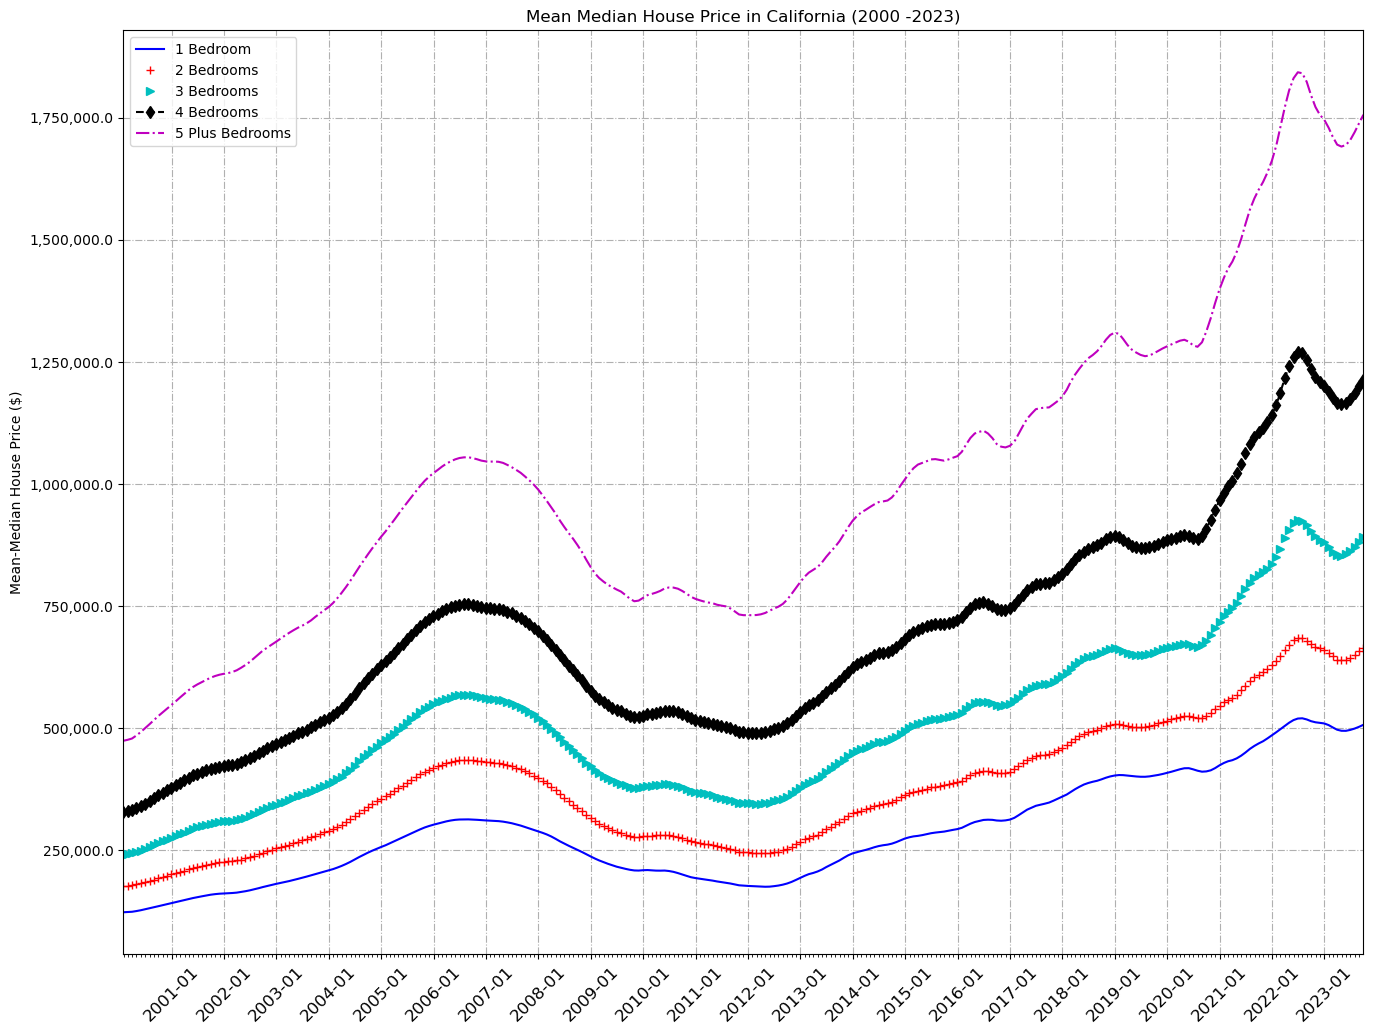

In [53]:
#plot time series, time in years vs mean median house price 
#import matplotlib.dates library to format dates on x axis
import datetime
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(16,12))

ax.plot(clz1.index, clz1['mean_median_house_price'], 'b-', label = '1 Bedroom')
ax.plot(clz2.index, clz2['mean_median_house_price'], 'r+', label = '2 Bedrooms')
ax.plot(clz3.index, clz3['mean_median_house_price'], 'c>', label = '3 Bedrooms')
ax.plot(clz4.index, clz4['mean_median_house_price'], 'kd--', label = '4 Bedrooms')
ax.plot(clz5.index, clz5['mean_median_house_price'], 'm-.', label = '5 Plus Bedrooms')

ax.set_xlim(datetime.datetime(2000,1,31), datetime.datetime(2023,9,30))
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

ax.tick_params( axis = 'x', labelsize = 12, labelrotation = 45)
ax.grid(True, linestyle ='-.')
 
ax.ticklabel_format(axis = 'y', style = 'plain')  
ax.set_ylabel('Mean-Median House Price ($)')

#format y axis values with thousands seperator

ax.yaxis.set_major_formatter(
FuncFormatter(lambda y, p: format(y, ',')))

plt.legend()
plt.title('Mean Median House Price in California (2000 -2023)')
plt.show()


## 6. Classification Machine Learning

### Lending Club Dataset - Risk Analysis (Pay Off/Charged Off)

### <u> Clustering - K-Means </u>



In [69]:

X= lending_club_clean[['loan_amnt', 'annual_inc', 'dti']]

X

,loan_amnt,annual_inc,dti
2,15600.0,43057.0,12.79
4,24375.0,55000.0,33.95
5,20000.0,86788.0,16.31
6,18000.0,125000.0,1.36
8,18900.0,103000.0,12.52
...,...,...,...
396025,10000.0,40000.0,15.63
396026,21000.0,110000.0,21.45
396027,5000.0,56500.0,17.56
396028,21000.0,64000.0,15.88


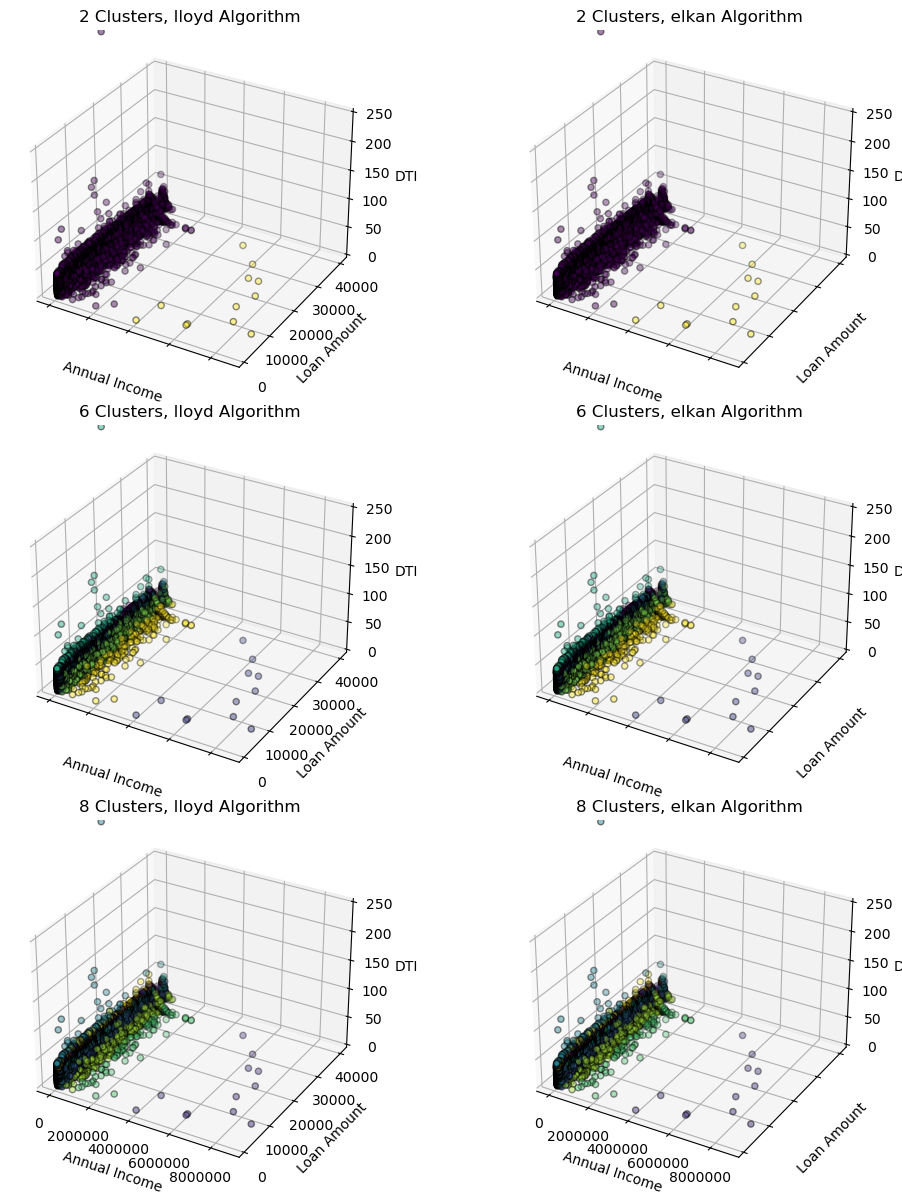

In [80]:
#clustering: Hierachical - Agglomerative method, Non-Herachical- KMeans]
#Keep it simple, we will only use k-means since we're using numerical data and well compace clusters
#seperate data into types of borrowers (each of the 3 variables can be high or low, total of 8 possible combinations/clusters)
## Only use 3 features for the sake of visualization and run-time (more variables mean higher dimensions which requires more computing resources)

from sklearn.cluster import KMeans #import ML model

n_clusters = [2,6,8]
algorithms = ["lloyd", "elkan"]
colors = ['darkslategray', 'fuchsia', 'darkorange']

fig, ax = plt.subplots(3,2, figsize= (12,12), subplot_kw={"projection": "3d"}, sharex= True, sharey = True)

for i, n in enumerate(n_clusters):
    for j, a in enumerate(algorithms):
        kmeans_model = KMeans(n_clusters = n, n_init = 'auto',random_state=0,  algorithm = a) #instantiate model
        
        kmeans_model.fit(X)
        labels = kmeans_model.labels_
        
        ax[i,j].scatter(X.iloc[:,1], X.iloc[:,0], X.iloc[:,2], c = labels.astype(float), edgecolor = 'k')
        ax[i,j].set_xlabel("Annual Income")
        ax[i,j].set_ylabel("Loan Amount")
        ax[i,j].set_zlabel("DTI")
        ax[i,j].set_title(f"{n} Clusters, {a} Algorithm")
        ax[i,j].set_zlim(0,250)
        ax[i,j].ticklabel_format(axis = 'x', style = 'plain')


fig.subplots_adjust(hspace= 0.45)
fig.tight_layout()

In [82]:
#create dummies for categorical features
lending_club_classification= lending_club_clean.drop(columns = ['sub_grade', 'installment', 'issue_d', 'emp_length','title','initial_list_status',
                                                                 'application_type', 'home_ownership', 'verification_status', 'earliest_cr_line', 'open_acc', 'revol_util',
                                                                'total_acc', 'mort_acc', 'term_months', 'installment', 'grade',])

X_ = pd.get_dummies(lending_club_classification)
X_.columns = X_.columns.str.lower().str.replace(" ", "_")

X_.rename(columns= {'mortgage_mortgage': 'mortage', 'mortgage_no_mortgage':'no_mortgage', 'loan_status_fully_paid': 'loan_status'}, inplace = True)

In [83]:
X_ = X_.dropna()
X_.isnull().sum() #remove extra null value

loan_amnt                  0
int_rate                   0
annual_inc                 0
dti                        0
pub_rec                    0
revol_bal                  0
pub_rec_bankruptcies       0
emp_length_copy            0
credit_hist_len_years      0
loan_status_charged_off    0
loan_status                0
mortage                    0
no_mortgage                0
dtype: int64

In [84]:

#seperate X matrix and y(target) vector
y = X_['loan_status']
X = X_.drop(columns = ['loan_status_charged_off','loan_status'])
y.value_counts() #number of True/False for loan default

loan_status
True     211581
False     59366
Name: count, dtype: int64

### <u> K-Neirest Neighbor (K= 400) </u> 

In [85]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) #split between train and test set


In [86]:
knn_model = KNeighborsClassifier(n_neighbors = 400, weights = 'uniform') #instantiate model
knn_model.fit(X_train, y_train) #fit model to training data/train model
y_pred = knn_model.predict(X_test) #test model on testing set
    
score = accuracy_score(y_test, y_pred) #check accuracy/validation score

print('knn validation score:',score)
#trial and error to find best k, implementing function to check multiple values takes too much computing power

print(classification_report(y_test, y_pred)) #shows that there were no false negatives, but a couple false positives

knn validation score: 0.7800209140677862
              precision    recall  f1-score   support

       False       0.00      0.00      0.00     17881
        True       0.78      1.00      0.88     63404

    accuracy                           0.78     81285
   macro avg       0.39      0.50      0.44     81285
weighted avg       0.61      0.78      0.68     81285



C:\Users\laris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#try cross validation

### <u> Logistic Regression </u>

In [87]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

log_reg_score = accuracy_score(y_test, y_pred) #check accuracy/validation score

print('Logistic Regression validation score:',log_reg_score)
print(classification_report(y_test, y_pred))

#quicker run time than KNN

Logistic Regression validation score: 0.7800209140677862
              precision    recall  f1-score   support

       False       0.00      0.00      0.00     17881
        True       0.78      1.00      0.88     63404

    accuracy                           0.78     81285
   macro avg       0.39      0.50      0.44     81285
weighted avg       0.61      0.78      0.68     81285



C:\Users\laris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
log_reg.coef_

array([[-7.75421579e-06,  1.06605719e-08,  1.67105860e-05,
         6.56118388e-08,  1.18533982e-09,  2.34028680e-06,
         1.40031371e-09,  3.65132393e-08,  9.34404563e-08,
         4.80957323e-09,  1.62978578e-09]])

In [89]:
log_reg.intercept_

array([6.43935902e-09])

### <u> Decision Trees </u>

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

dt_score = accuracy_score(y_test, y_pred) #check accuracy/validation score

print('Decision Tree validation score:',dt_score)
print(classification_report(y_test, y_pred))



Decision Tree validation score: 0.6782555206987759
              precision    recall  f1-score   support

       False       0.29      0.31      0.30     17881
        True       0.80      0.78      0.79     63404

    accuracy                           0.68     81285
   macro avg       0.54      0.55      0.54     81285
weighted avg       0.69      0.68      0.68     81285



[Text(0.5, 0.9166666666666666, 'x[1] <= 15.585\ngini = 0.342\nsamples = 189662\nvalue = [41485, 148177]'),
 Text(0.25, 0.75, 'x[1] <= 12.22\ngini = 0.255\nsamples = 117924\nvalue = [17656, 100268]'),
 Text(0.125, 0.5833333333333334, 'x[1] <= 9.165\ngini = 0.186\nsamples = 64026\nvalue = [6640, 57386]'),
 Text(0.0625, 0.4166666666666667, 'x[1] <= 7.67\ngini = 0.13\nsamples = 27368\nvalue = [1913, 25455]'),
 Text(0.03125, 0.25, 'x[2] <= 37757.58\ngini = 0.096\nsamples = 13254\nvalue = [667, 12587]'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'x[3] <= 23.565\ngini = 0.161\nsamples = 14114\nvalue = [1246, 12868]'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1875, 0.4166666666666667, 'x[3] <= 16.655\ngini = 0.225\nsamples = 36658\nvalue = [4727, 31931]'),
 Text(0.15625, 0.25, 'x[2] <= 37088.5\ngini = 0.189\nsamples = 18688\nvalue

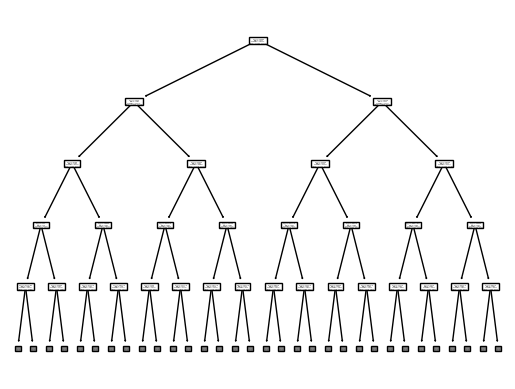

In [91]:
tree.plot_tree(dt_model, max_depth = 4)

## 7.  Prediction Machine Learning (Time Series)

In [92]:
pred_clz1 = clz1['mean_median_house_price']
pred_clz1

2000-01-31    122743.868362
2000-02-29     123169.87252
2000-03-31    123766.181147
2000-04-30    125168.238456
2000-05-31    126891.768223
                  ...      
2023-05-31    494379.149466
2023-06-30    496242.024607
2023-07-31    499053.044049
2023-08-31    502668.957255
2023-09-30    506758.863119
Name: mean_median_house_price, Length: 285, dtype: object

### <u>Simple Linear Regression </u>

In [93]:
#Linear reg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #(RMSE)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

linear_rmse = mean_squared_error(y_test, y_pred)

print('Linear Regression RMSE (Mean Squared Error):',linear_rmse) #recall median house price is in the ranges of 100,000 to 500,000

Linear Regression RMSE (Mean Squared Error): 0.15888882894207662


In [94]:
print(linear_reg_model.coef_)
print(linear_reg_model.intercept_)

[-1.15768988e-06 -2.07586258e-02  1.94132255e-07 -3.74319591e-03
 -1.40836885e-02  4.39437467e-07  2.09015285e-02  2.12421687e-03
  2.91329931e-04 -6.79454059e-03  6.79454059e-03]
1.128345903051028


### <u>K-Nearest Neighbor for Prediction of Continuous Values </u>

In [95]:
#knn
from sklearn.neighbors import KNeighborsRegressor 

knn_reg_model = KNeighborsRegressor(n_neighbors = 10)
knn_reg_model.fit(X_train, y_train)

y_pred = knn_reg_model.predict(X_test)

knn_reg_rmse = mean_squared_error(y_test, y_pred)

print('KNN Regressor RMSE (Mean Squared Error):',knn_reg_rmse)

KNN Regressor RMSE (Mean Squared Error): 0.1829400258350249


### <u>Decision Trees for Prediction of Continuous Values </u>

In [97]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

dt_reg_model = DecisionTreeRegressor()

dt_reg_model.fit(X_train, y_train)

y_pred = dt_reg_model.predict(X_test)

dt_reg_rmse = mean_squared_error(y_test, y_pred)

print('Decision Tree Regressor RMSE (Mean Squared Error):', dt_reg_rmse)

Decision Tree Regressor RMSE (Mean Squared Error): 0.322322691763548


## Conclusion

- Three Machine learning models were used on the lending club dataset to classify an application as 'Fully Paid' or 'Charged Off', it enabled to determine whether a borrower would be likely to pay off a loan. The best classification models were **KNN** and **Logistic Regression**, both with an accuracy of 78%. The decision tree classifier was less accurate with an accuracy of 68%.
- In the prediction of housing prices, we used a simple time series with median house prices recorded each month from 01-2000 to 09-2023. The dataset did not include additional features/variables which could have impacted the result. The data collected did not have such information related to the time. Nevertheless, the regressor models had very small mean squared errors, and the best model was **Linear Regression** with an RMSE of 0.16, we can assume that generally housing prices follow a linear trend over the course of a couple decades.

sources:
    https://www.bankrate.com/mortgages/mortgage-statistics/
        https://www.lendingclub.com/company/about-us
            https://www.zillow.com/research/data/
                https://www.gps-latitude-longitude.com/
                    https://www.massgeneralbrigham.org/en/about/newsroom/press-releases/chatgpt-shows-impressive-accuracy-in-clinical-decision-making
                   #note ChatGPT study in clinical decision making showed that it was Approximately 72% accurate
